# DSCI 100 Group 37: Final Project

## Description and usage of the game data:

In this project, we will be working with local game data from UBC (University of British Columbia), called PLAIcraft, ran by a group of people in the department of Computer Science. This project aims to conver analysis and modelling of the data, visualizing it graphically to predict any correlations between any variables used. The data consists of two files: Project_Planning_Players.csv and Sessions.  This project will only require the Players data.  

## Predicting Experience Level Using Age and Hours Played

### Introduction



The player dataset includes unique data for each individual player. There are 196 observations, which indicate the number of players in the dataset and 7 variables. 

|Variable|Type|Description|
|--------|----|-----------|
|experience|Character|Experience level of a player|
|subscribe|Character|If the player is subscribed to the news letter|
|hashedEmail|Character|Player's unique hashed email|
|played_hours|double|Number of hours played|
|name|Character|Name of player|
|gender|Character|Gender of player|
|Age|Double|Age of player|

## Loading the data into Jupiter

Below only the Project_Planning_Players.csv will be loaded in, as it is the only file that we need to complete the project

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
# Initial data loading
player_url<- "https://raw.githubusercontent.com/tiannawong/dsci100-individual-project-/refs/heads/main/players.csv"

player_data <- read_csv(player_url)
head(player_data)
tail(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


The head and the tail is shown above for *Project_Planning_Players.csv*

## Wrangling

Below, we want to choose all the columns we need, as we are trying to predict which experience level plays the most for certain age and playing time.  We will make it simplified by selecting only Experience, played_hours, and Age.

In [6]:
# Wrangling data to use only columns that are needed
select_player_data <- player_data |>
    mutate(experience = as_factor(experience)) |>
    select(experience, Age, played_hours)
head(select_player_data)
tail(select_player_data)

experience,Age,played_hours
<fct>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0


experience,Age,played_hours
<fct>,<dbl>,<dbl>
Amateur,20,0.0
Amateur,17,0.0
Veteran,22,0.3
Amateur,17,0.0
Amateur,17,2.3
Pro,NA,0.2


## Methods and Results

In this project, we want to use k-nn classification to predict a new user's experience level.  Before we model and train the data, we want to perform simple visualizations to get a better understanding of what we are working with.  Below will be graphs that visualize different aspects of the data.

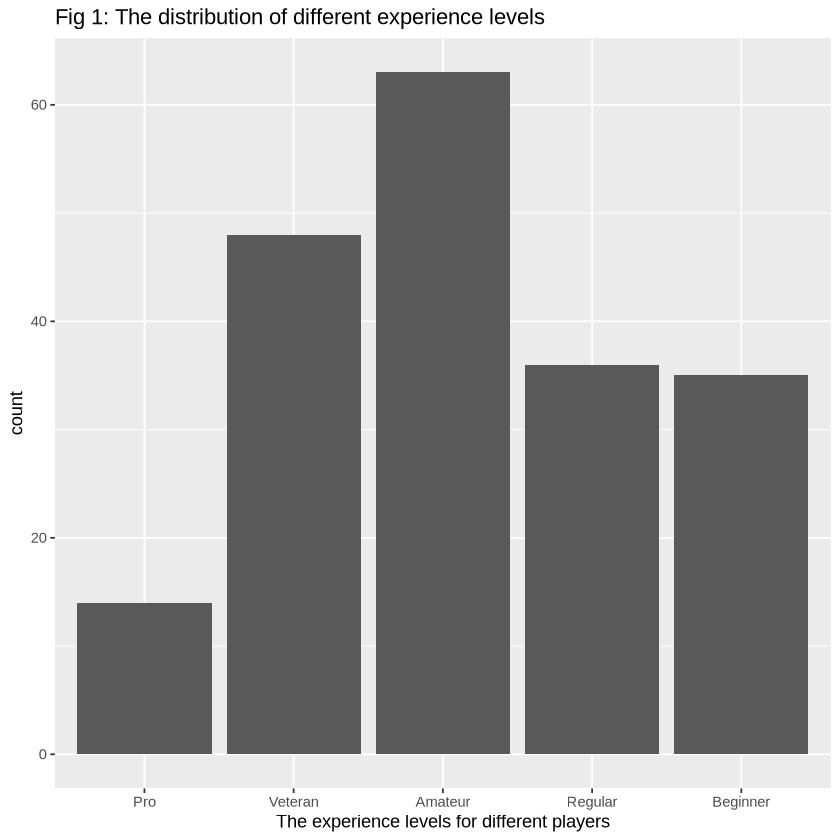

In [7]:
# Create bar graph with player count of each experience level
select_player_data_bar <- select_player_data |>
    ggplot(aes(x = experience)) +
    geom_bar(stat = "count") +
    labs(x = "The experience levels for different players", title = "Fig 1: The distribution of different experience levels")
select_player_data_bar

Explaination of graph: The gar graph shows the amount of players per experience level.  We can see that there are more amateur players than any other players, followed by veterans.

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”


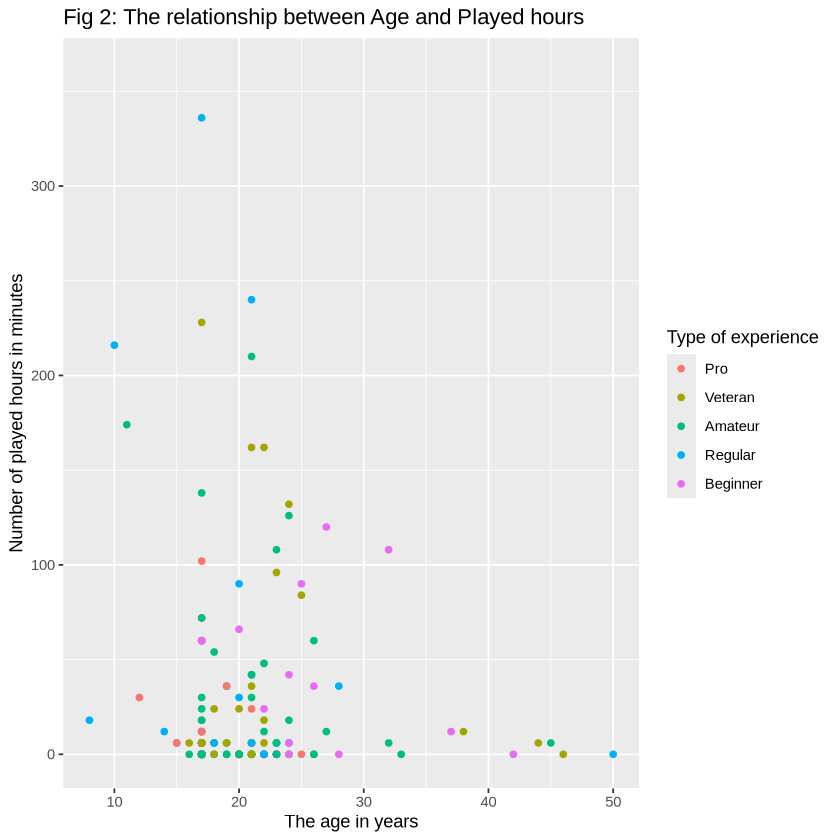

In [8]:
# Create scatterplot with Age vs. played_hours
select_player_data_plot <- select_player_data |>
    mutate(played_mins = (played_hours * 60)) |>
    ggplot(aes(x = Age, y = played_mins)) +
    ylim(0, 360) +
    geom_point(aes(color = experience)) +
    labs(x = "The age in years", y = "Number of played hours in minutes", color = "Type of experience", title = "Fig 2: The relationship between Age and Played hours")
select_player_data_plot

Explaination of graph: The scatter plot shows age and the different types of experience levels relative to the playing time in minutes.  To make the graph visually pleasing, we had to  limit the amount of play time to 6 hours (360 minutes).  From the graph, we are not able to pick up a pattern on age and playing time

## Training and modeling data

In this portion, we will start to train and model the players data so that we can predict which experience levels fits with a new data point given

In [9]:
# splitting the data into training and testing data

player_split <- select_player_data |>
    initial_split(prop = 0.75, strata = experience)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training)
head(player_testing)

experience,Age,played_hours
<fct>,<dbl>,<dbl>
Amateur,21,0.7
Amateur,17,0.0
Amateur,21,0.0
Amateur,17,0.1
Amateur,22,0.2
Amateur,22,0.0


experience,Age,played_hours
<fct>,<dbl>,<dbl>
Veteran,17,3.8
Pro,17,0.0
Beginner,17,0.0
Amateur,17,0.5
Regular,8,0.3
Beginner,17,1.0


Below we are creating a recipe that will predict the experience based on the player's age and played hours

In [10]:
# Creating recipe to predict experience with age and played hours
players_recipe <- recipe(experience ~ Age + played_hours, data = player_training)
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [11]:
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
players_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [15]:
# Perform the cross-validation
players_vfold <- vfold_cv(player_training, v = 5, strata = experience)

In [17]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_fit <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(players_tune) |>
      tune_grid(resamples = players_vfold, grid = k_vals) |>
      collect_metrics()

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





neighbors,.config
<dbl>,<chr>
3,Preprocessor1_Model02


# A tibble: 2 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy multiclass    0.212 
2 kap      multiclass   -0.0660
          Truth
Prediction Amateur Beginner Pro Regular Veteran
  Amateur        9        6   4       3       9
  Beginner       0        2   1       2       2
  Pro            1        0   0       0       0
  Regular        3        1   1       0       1
  Veteran        3        1   0       3       0


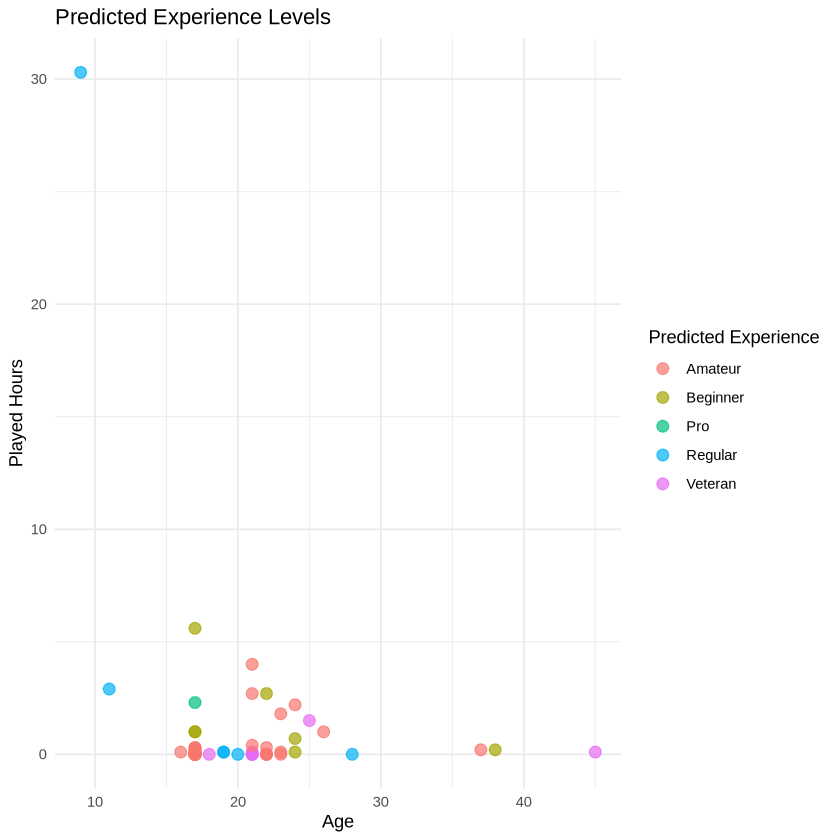

In [30]:
player_data <- player_data |>
  mutate(experience = as.factor(experience))

set.seed(123)
player_split <- initial_split(player_data, prop = 0.75, strata = experience)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_training <- player_training |>
  mutate(experience = as.factor(experience))

player_testing <- player_testing |>
  mutate(experience = as.factor(experience))

players_recipe <- recipe(experience ~ Age + played_hours, data = player_training)

knn_model <- nearest_neighbor(
  mode = "classification",
  neighbors = tune(),
  weight_func = "rectangular"
) %>%
  set_engine("kknn")

knn_workflow <- workflow() |>
  add_model(knn_model) |>
  add_recipe(players_recipe)

folds <- vfold_cv(player_training, v = 5, strata = experience)

k_values <- tibble(neighbors = seq(1, 30, by = 2))  # Try odd k values from 1 to 30

tuned_results <- tune_grid(
  knn_workflow,
  resamples = folds,
  grid = k_values,
  metrics = metric_set(accuracy)
)

best_k <- select_best(tuned_results, "accuracy")
best_k

final_knn <- finalize_workflow(knn_workflow, best_k)
final_fit <- fit(final_knn, data = player_training)

predictions <- predict(final_fit, player_testing) |>
  bind_cols(player_testing)

predictions <- predictions |>
  mutate(.pred_class = factor(.pred_class, levels = levels(experience)))

metrics <- predictions |>
  metrics(truth = experience, estimate = .pred_class)

conf_mat <- predictions |>
  conf_mat(truth = experience, estimate = .pred_class)

print(metrics)
print(conf_mat)

ggplot(predictions, aes(x = Age, y = played_hours, color = .pred_class)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Predicted Experience Levels",
       x = "Age", y = "Played Hours",
       color = "Predicted Experience") +
  theme_minimal()

In [31]:
Part 2 Method Explanation




Tiana?



Part 3 Explanation


Varun?

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected numeric constant
1: Part 2
         ^
